In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datapath = "../../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (224, 224)
batch_size = 16

True


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(os.path.join(datapath, "train"),
                                             target_size = image_dims,
                                            batch_size = batch_size,
                                             class_mode = 'categorical',
                                            color_mode = 'rgb',
                                                   shuffle=True)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = batch_size,
                                                             class_mode = 'categorical', 
                                                             color_mode = 'rgb')
validation_generator = validation_datagen.flow_from_directory(os.path.join(datapath, "valid"), 
                                                     target_size = image_dims,
                                                      batch_size = batch_size,
                                                     class_mode = 'categorical', 
                                                     color_mode = 'rgb',
                                                             shuffle=True)

Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
    # to suppress warnings
    import warnings
    warnings.filterwarnings('ignore')

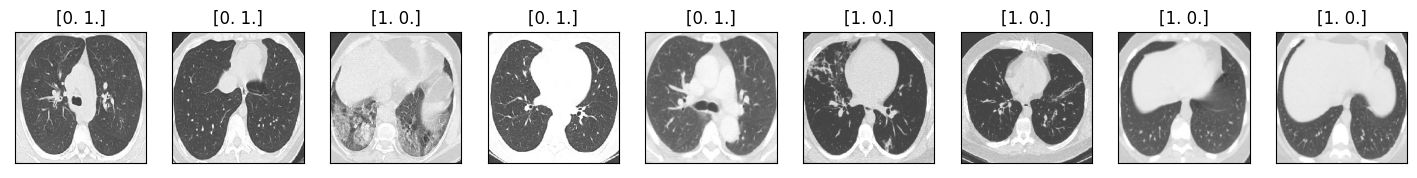

In [6]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
# samples = iter(enumerate(train_generator), n)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(ytrain[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### plot

In [7]:
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs[2:], loss[2:], '--r', label='Training loss')
    plt.plot(epochs[2:], val_loss[2:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

## part1
### loading vgg19 and training 

In [8]:
import tensorflow as tf
import keras

In [9]:
## supress tensorflow warning displayed in results
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [9]:
vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3))
vgg_model.summary()
vgg_model.trainable=False 

x = vgg_model.layers[-1].output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
output = keras.layers.Dense(2, activation='softmax')(x)

vgg = keras.Model(vgg_model.input, output)
vgg._name='vgg19'
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model_checkpoint_path = 'models/test1/vgg19'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [11]:
vgg.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

vgg_history = vgg.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                       callbacks=[model_checkpoint_callback])

Epoch 1/100
47/47 [==============================] - 150s 3s/step - loss: 0.8368 - binary_accuracy: 0.7043 - val_loss: 1.0338 - val_binary_accuracy: 0.6365
Epoch 2/100
47/47 [==============================] - 122s 3s/step - loss: 0.3316 - binary_accuracy: 0.8602 - val_loss: 0.1630 - val_binary_accuracy: 0.9438
Epoch 3/100
47/47 [==============================] - 123s 3s/step - loss: 0.1706 - binary_accuracy: 0.9375 - val_loss: 0.1214 - val_binary_accuracy: 0.9478
Epoch 4/100
47/47 [==============================] - 123s 3s/step - loss: 0.1067 - binary_accuracy: 0.9550 - val_loss: 0.0850 - val_binary_accuracy: 0.9719
Epoch 5/100
47/47 [==============================] - 129s 3s/step - loss: 0.0695 - binary_accuracy: 0.9711 - val_loss: 0.1059 - val_binary_accuracy: 0.9518
Epoch 6/100
47/47 [==============================] - 124s 3s/step - loss: 0.0332 - binary_accuracy: 0.9892 - val_loss: 0.0929 - val_binary_accuracy: 0.9618
Epoch 7/100
47/47 [==============================] - 122s 3s/ste

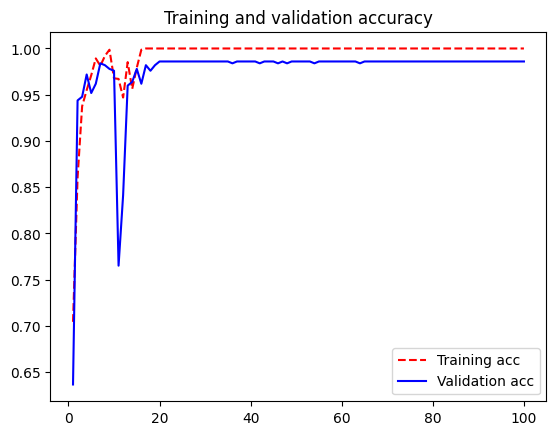

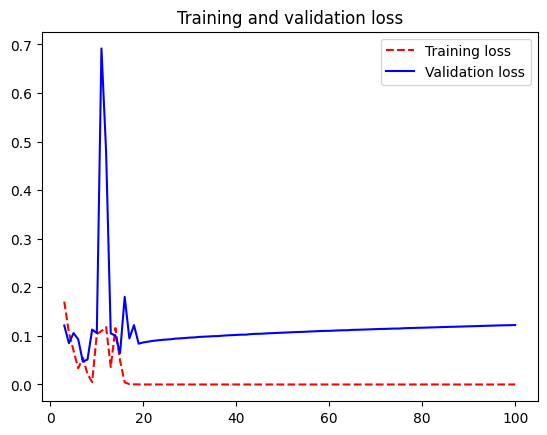

In [22]:
plot_accuracy_and_loss(vgg_history)

In [13]:
test_loss, test_acc = vgg.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

16/16 [==============================] - 41s 3s/step - loss: 0.2290 - binary_accuracy: 0.9737
Accuracy: 0.973737359046936
Loss:  0.22900910675525665


## part2
### densenet 169 - 1000 - 2

In [14]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
dense169_model.summary()
dense169_model.trainable=False 

x = dense169_model.layers[-1].output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
output = keras.layers.Dense(2, activation='softmax')(x)

densenet_1 = keras.Model(dense169_model.input, output)
densenet_1._name='densenet_1'
densenet_1.summary()

51888128/51877672 [==============================] - 19s 0us/step
Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                      

 conv5_block2_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 7, 7, 704)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 7, 7, 704)   2816        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
          

Model: "densenet_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                         

                                                                                                  
 conv5_block2_concat (Concatena  (None, 7, 7, 704)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 7, 7, 704)   2816        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_0_relu (Activatio  (None, 7, 7, 704)   0           ['conv5_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

In [15]:
model_checkpoint_path = 'models/test1/densenet-1000'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [18]:
densenet_1.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_1_history = densenet_1.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                              callbacks=[model_checkpoint_callback])

Epoch 1/100
47/47 [==============================] - 142s 3s/step - loss: 6.0009 - binary_accuracy: 0.8226 - val_loss: 0.7949 - val_binary_accuracy: 0.9237
Epoch 2/100
47/47 [==============================] - 100s 2s/step - loss: 0.4913 - binary_accuracy: 0.9449 - val_loss: 0.2761 - val_binary_accuracy: 0.9618
Epoch 3/100
47/47 [==============================] - 101s 2s/step - loss: 0.4623 - binary_accuracy: 0.9469 - val_loss: 0.4400 - val_binary_accuracy: 0.9518
Epoch 4/100
47/47 [==============================] - 102s 2s/step - loss: 0.1398 - binary_accuracy: 0.9819 - val_loss: 0.3891 - val_binary_accuracy: 0.9639
Epoch 5/100
47/47 [==============================] - 363s 8s/step - loss: 0.0346 - binary_accuracy: 0.9919 - val_loss: 0.2989 - val_binary_accuracy: 0.9719
Epoch 6/100
47/47 [==============================] - 132s 3s/step - loss: 0.0176 - binary_accuracy: 0.9966 - val_loss: 0.2685 - val_binary_accuracy: 0.9699
Epoch 7/100
47/47 [==============================] - 101s 2s/ste

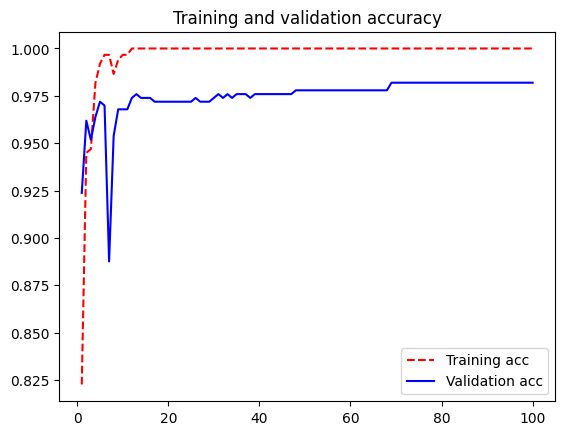

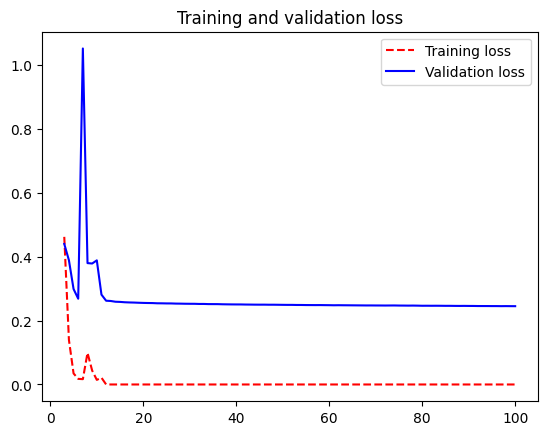

In [23]:
plot_accuracy_and_loss(densenet_1_history)

In [24]:
test_loss, test_acc = densenet_1.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

16/16 [==============================] - 34s 2s/step - loss: 0.5517 - binary_accuracy: 0.9434
Accuracy: 0.9434343576431274
Loss:  0.5517028570175171


## part3
### DenseNet169-1000-500-200

In [10]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
dense169_model.summary()
## already done in part 2
dense169_model.trainable=False 
x = dense169_model.layers[-1].output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
output = keras.layers.Dense(2, activation='softmax')(x)

densenet_2 = keras.Model(dense169_model.input, output)
densenet_2._name='densenet_2'
densenet_2.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 conv5_block3_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block3_1_relu[0][0]']    
                                                                                                  
 conv5_block3_concat (Concatena  (None, 7, 7, 736)   0           ['conv5_block2_concat[0][0]',    
 te)                                                              'conv5_block3_2_conv[0][0]']    
          

Model: "densenet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                         

 pool4_bn (BatchNormalization)  (None, 14, 14, 1280  5120        ['conv4_block32_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1280  0           ['pool4_bn[0][0]']               
                                )                                                                 
                                                                                                  
 pool4_conv (Conv2D)            (None, 14, 14, 640)  819200      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 7, 7, 640)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

In [12]:
model_checkpoint_path = 'models/test1/densenet-1000-500-200'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [13]:
densenet_2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_2_history = densenet_2.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                              callbacks=[model_checkpoint_callback])

Epoch 1/100
47/47 [==============================] - 283s 5s/step - loss: 4.3581 - binary_accuracy: 0.7339 - val_loss: 0.2716 - val_binary_accuracy: 0.9137
Epoch 2/100
47/47 [==============================] - 221s 5s/step - loss: 0.2107 - binary_accuracy: 0.9247 - val_loss: 0.1043 - val_binary_accuracy: 0.9538
Epoch 3/100
47/47 [==============================] - 106s 2s/step - loss: 0.0710 - binary_accuracy: 0.9765 - val_loss: 0.2789 - val_binary_accuracy: 0.9056
Epoch 4/100
47/47 [==============================] - 104s 2s/step - loss: 0.0556 - binary_accuracy: 0.9751 - val_loss: 0.1750 - val_binary_accuracy: 0.9357
Epoch 5/100
47/47 [==============================] - 103s 2s/step - loss: 0.0237 - binary_accuracy: 0.9899 - val_loss: 0.1580 - val_binary_accuracy: 0.9518
Epoch 6/100
47/47 [==============================] - 103s 2s/step - loss: 0.0179 - binary_accuracy: 0.9926 - val_loss: 0.1937 - val_binary_accuracy: 0.9378
Epoch 7/100
47/47 [==============================] - 203s 4s/ste

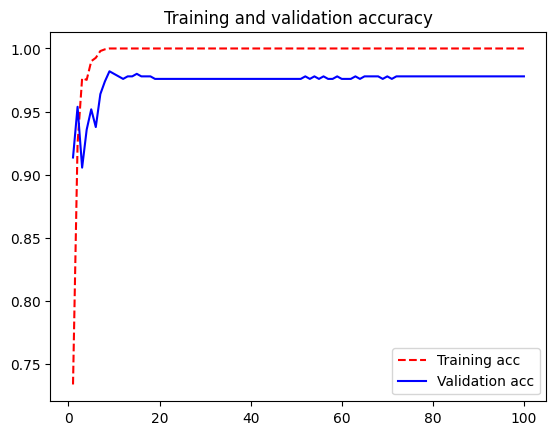

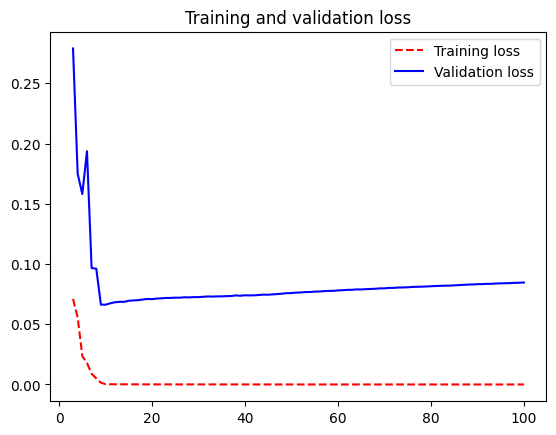

In [14]:
plot_accuracy_and_loss(densenet_2_history)

In [15]:
test_loss, test_acc = densenet_2.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)


16/16 [==============================] - 34s 2s/step - loss: 0.1919 - binary_accuracy: 0.9636
Accuracy: 0.9636363387107849
Loss:  0.19191010296344757


## Final step
### Loading and Ensembling all 3 models

In [9]:
vgg = tf.keras.models.load_model('models/test1/vgg19')
densenet_1 = tf.keras.models.load_model('models/test1/densenet-1000')
densenet_2 = tf.keras.models.load_model('models/test1/densenet-1000-500-200')

In [15]:
vgg.trainable = False
densenet_1.trainable = False
densenet_2.trainable = False
models = [vgg, densenet_1, densenet_2]
# to avoid conflicts with naming
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')
    

In [16]:
input_layer = keras.Input(shape=(224, 224, 3))

y1 = vgg(input_layer)
y2 = densenet_1(input_layer)
y3 = densenet_2(input_layer)
concatenate = tf.keras.layers.average([y1, y2, y3])
output = tf.keras.layers.Dense(1, activation='softmax')(concatenate)

ensembled = keras.Model(input_layer, output)

ensembled.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg19 (Functional)             (None, 2)            45714486    ['input_1[0][0]']                
                                                                                                  
 densenet_1 (Functional)        (None, 2)            94181882    ['input_1[0][0]']                
                                                                                                  
 densenet_2 (Functional)        (None, 2)            94780982    ['input_1[0][0]']            

In [10]:
model_checkpoint_path = 'models/test1/ensembled-avg'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [18]:
ensembled.compile(
            optimizer=tf.keras.optimizers.Adam(1e-3),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [11]:
ensembled_history = vgg.fit(train_generator,
                                    epochs=10,
                                    validation_data=validation_generator,
                                    callbacks=[model_checkpoint_callback])

Epoch 1/10
93/93 [==============================] - 153s 2s/step - loss: 0.0403 - binary_accuracy: 0.9845 - val_loss: 0.0747 - val_binary_accuracy: 0.9779
Epoch 2/10
93/93 [==============================] - 129s 1s/step - loss: 0.0479 - binary_accuracy: 0.9792 - val_loss: 0.2351 - val_binary_accuracy: 0.9418
Epoch 3/10
93/93 [==============================] - 131s 1s/step - loss: 0.0095 - binary_accuracy: 0.9960 - val_loss: 0.0883 - val_binary_accuracy: 0.9819
Epoch 4/10
93/93 [==============================] - 140s 2s/step - loss: 9.4731e-05 - binary_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9880
Epoch 5/10
93/93 [==============================] - 132s 1s/step - loss: 1.2561e-05 - binary_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9880
Epoch 6/10
93/93 [==============================] - 132s 1s/step - loss: 5.9750e-06 - binary_accuracy: 1.0000 - val_loss: 0.0789 - val_binary_accuracy: 0.9880
Epoch 7/10
93/93 [==============================] - 132s 1

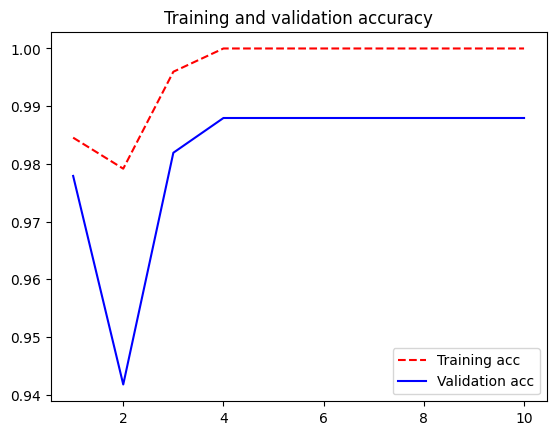

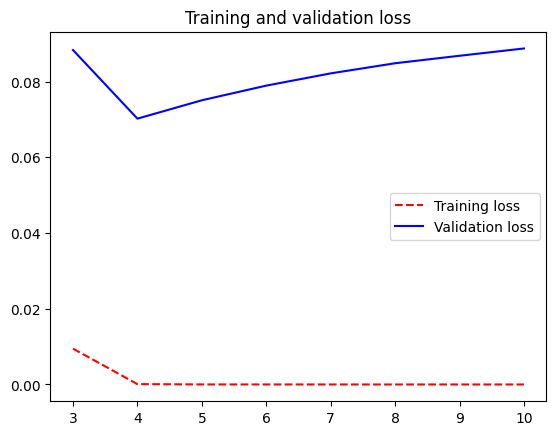

In [12]:
plot_accuracy_and_loss(ensembled_history)

In [14]:
test_loss, test_acc = vgg.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

31/31 [==============================] - 38s 1s/step - loss: 0.1971 - binary_accuracy: 0.9758
Accuracy: 0.9757575988769531
Loss:  0.19713258743286133
